In [1]:
import tensorflow_datasets as tfds
import matplotlib.pyplot as plt
import pandas as pd

# List available datasets to see the exact names
# print(tfds.list_builders())

In [2]:
# Load the dataset with metadata
dataset, info = tfds.load("oxford_flowers102", with_info=True)

# 1. Extract Statistics
stats = {
    "Total Classes": info.features['label'].num_classes,
    "Train Samples": info.splits['train'].num_examples,
    "Test Samples": info.splits['test'].num_examples,
    "Image Shape": info.features['image'].shape,
}

# Convert to a clean table using Pandas
df_stats = pd.DataFrame(stats.items(), columns=['Statistic', 'Value'])
print(df_stats)

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Extraction completed...: 0 file [00:00, ? file/s]

Generating splits...:   0%|          | 0/3 [00:00<?, ? splits/s]

Generating train examples...: 0 examples [00:00, ? examples/s]

Shuffling /root/tensorflow_datasets/oxford_flowers102/incomplete.6O2RCF_2.1.1/oxford_flowers102-train.tfrecord…

Generating test examples...: 0 examples [00:00, ? examples/s]

Shuffling /root/tensorflow_datasets/oxford_flowers102/incomplete.6O2RCF_2.1.1/oxford_flowers102-test.tfrecord*…

Generating validation examples...: 0 examples [00:00, ? examples/s]

Shuffling /root/tensorflow_datasets/oxford_flowers102/incomplete.6O2RCF_2.1.1/oxford_flowers102-validation.tfr…

Dataset oxford_flowers102 downloaded and prepared to /root/tensorflow_datasets/oxford_flowers102/2.1.1. Subsequent calls will reuse this data.
       Statistic            Value
0  Total Classes              102
1  Train Samples             1020
2   Test Samples             6149
3    Image Shape  (None, None, 3)


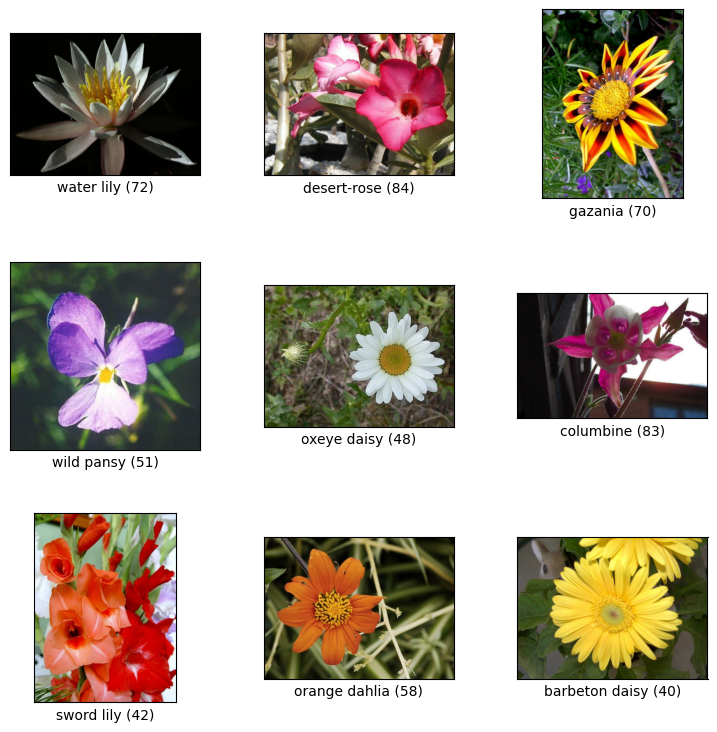

In [3]:
# Display a grid of images with their class labels
fig = tfds.show_examples(dataset['train'], info)

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Extraction completed...: 0 file [00:00, ? file/s]

Generating splits...:   0%|          | 0/3 [00:00<?, ? splits/s]

Generating train examples...: 0 examples [00:00, ? examples/s]

Shuffling /root/tensorflow_datasets/coco/2017/incomplete.5SX26Q_1.1.0/coco-train.tfrecord*...:   0%|          …

Generating validation examples...: 0 examples [00:00, ? examples/s]

Shuffling /root/tensorflow_datasets/coco/2017/incomplete.5SX26Q_1.1.0/coco-validation.tfrecord*...:   0%|     …

Generating test examples...: 0 examples [00:00, ? examples/s]

Shuffling /root/tensorflow_datasets/coco/2017/incomplete.5SX26Q_1.1.0/coco-test.tfrecord*...:   0%|          |…

Dataset coco downloaded and prepared to /root/tensorflow_datasets/coco/2017/1.1.0. Subsequent calls will reuse this data.
Available keys: dict_keys(['image', 'image/filename', 'image/id', 'objects'])


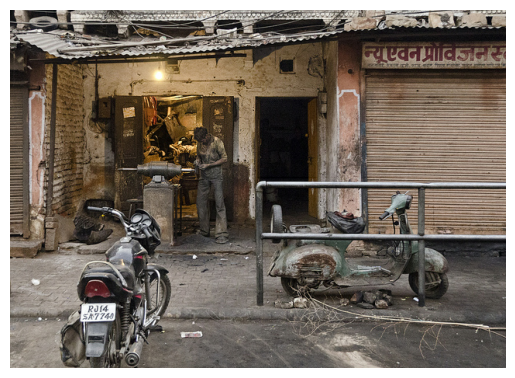

In [5]:
# Fixed loading command
# Use '2017' as the config name
coco_ds, coco_info = tfds.load("coco/2017", split="train", with_info=True)

# Inspect a single sample
for sample in coco_ds.take(1):
    image = sample['image'].numpy()
    # In the '2017' config, captions are stored under 'objects' or a specific key
    # Let's check the keys to be sure
    print("Available keys:", sample.keys())

    plt.imshow(image)
    plt.axis('off')
    plt.show()

Analyzing dataset structure...
-----------------------------------
DATASET: Oxford-102 Flowers
Number of Classes:      102
Average Resolution:     623x541
Avg Description Length: 11.6 characters
-----------------------------------


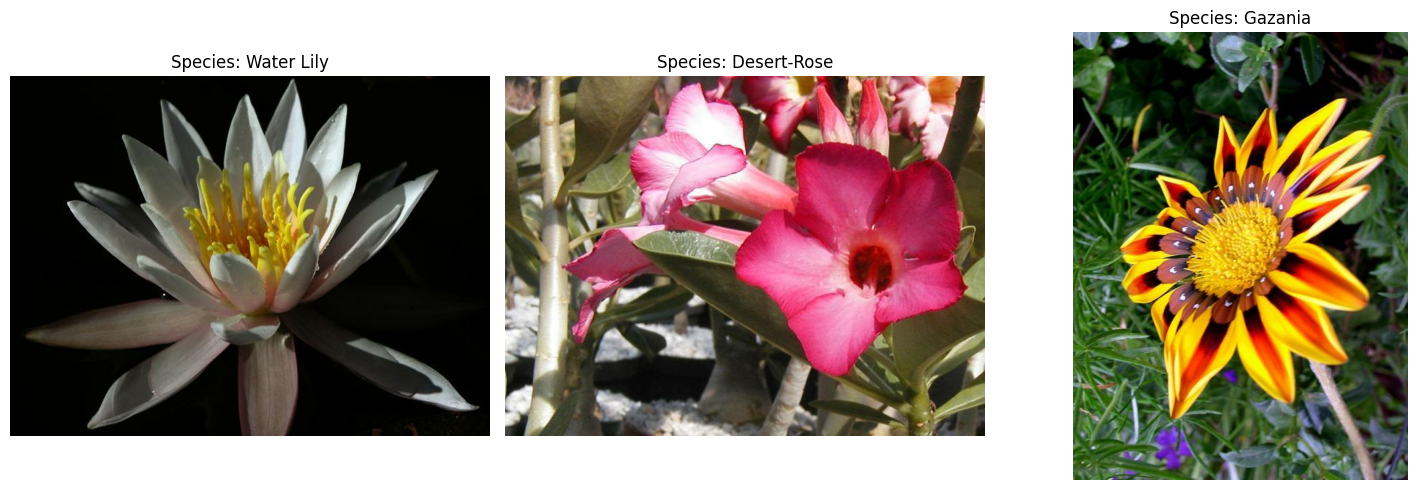

In [8]:
import tensorflow_datasets as tfds
import numpy as np
import matplotlib.pyplot as plt

# 1. Load the dataset (Smaller and more stable for Colab)
dataset, info = tfds.load("oxford_flowers102", split="train", with_info=True)

# 2. Extract Statistics
num_classes = info.features['label'].num_classes
class_names = info.features['label'].names

resolutions = []
name_lengths = []

print("Analyzing dataset structure...")

for sample in dataset.take(100):
    # Image Resolution
    resolutions.append(sample['image'].shape[:2]) # (height, width)

    # Description/Label Length
    label_idx = sample['label'].numpy()
    flower_name = class_names[label_idx]
    name_lengths.append(len(flower_name))

avg_res = np.mean(resolutions, axis=0)

# --- DISPLAY RESULTS ---
print("-" * 35)
print(f"DATASET: Oxford-102 Flowers")
print(f"Number of Classes:      {num_classes}")
print(f"Average Resolution:     {int(avg_res[1])}x{int(avg_res[0])}")
print(f"Avg Description Length: {np.mean(name_lengths):.1f} characters")
print("-" * 35)

# 3. Display Text Descriptions combined with Photos
plt.figure(figsize=(15, 5))
for i, sample in enumerate(dataset.take(3)):
    image = sample['image'].numpy()
    flower_name = class_names[sample['label'].numpy()]

    plt.subplot(1, 3, i + 1)
    plt.imshow(image)
    plt.title(f"Species: {flower_name.title()}")
    plt.axis('off')

plt.tight_layout()
plt.show()